# Implementing Mini Batch Gradient Descent Techinique for banglore price Dataset

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("Banglore_Prices.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
sx = MinMaxScaler()
sy = MinMaxScaler()

In [77]:
scaled_X = sx.fit_transform(df.drop("price",axis=1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [78]:
scaled_y = sy.fit_transform(df[["price"]]).reshape(df.shape[0],1)
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [79]:
def minibatch_gradient_descent(X,y_true,epochs,batch_size = 5,lr = 0.01):
    no_of_features = X.shape[1]
    total_samples = X.shape[0]
    w = np.ones(no_of_features)
    b = 0
    
    costl = []
    epoch = []
    if batch_size>total_samples:
        batch_size = total_samples
        
    num_batches = int(total_samples/batch_size)    
        
    for i in range(epochs):
        random_ind = np.random.permutation(total_samples)
#         random_ind = np.random.randint(20,size = total_samples)
        
        sample_X = X[random_ind]
        sample_y = y_true[random_ind]
        
        for j in range(0,total_samples,batch_size):
            
            Xf = sample_X[j:j+batch_size]
            yf = sample_y[j:j+batch_size]
        
            ypred = np.dot(w,Xf.T) + b   #  1X2   2X20  =  1X20
    #         ypred = sigmoid_numpy(weighted_sum)
            w_grad = -(2/len(Xf))*(Xf.T.dot(yf-ypred))  #2X20 
            b_grad = -(2/len(yf))*np.sum(yf-ypred)

            w = w - w_grad*lr
            b = b - b_grad*lr
            
            cost = np.mean(np.square(yf-ypred))

        if i%10==0:
                costl.append(cost)
                epoch.append(i)
    return w,b,cost,costl,epoch

In [80]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
#     print(scaled_X)
    scaled_price = w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])

In [81]:
w,b,cost,costl,epoch = minibatch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),epochs = 120)


In [82]:
predict(1000,4,w,b)

array([[75.77390224]])

## Graphical representation for Mini Batch Gradient Descent

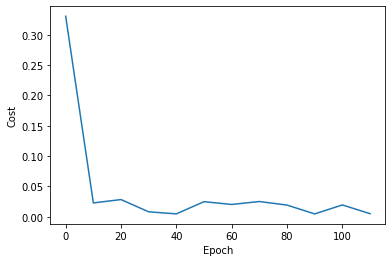

In [84]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch,costl)